In [1]:
import sys
sys.path.insert(0, '../asyncroscopy/clients/')
from tem_client import TEMClient
import matplotlib.pyplot as plt


In [2]:
# connecting the TEMClient to the central (async) server
tem = TEMClient.connect(host='localhost',port=9000)


Connecting to central server localhost:9000...
Connected to central server.


In [3]:
# connection from central server to the AS server
# tem.connect_AS(host="127.0.0.1", port=9095)
tem.connect_AS("localhost", 9001)

[client] sending: AS_connect_AS localhost 9001
[client] sent: AS_connect_AS localhost 9001


'[AS] Connected to microscope.'

In [4]:
tem.get_status()

[client] sending: AS_get_status
[client] sent: AS_get_status


'Microscope is Ready'

### Getting an image takes 5 seconds:

[client] sending: AS_get_scanned_image HAADF 300 1e-05
[client] sent: AS_get_scanned_image HAADF 300 1e-05
[[123 222 193 ...  96 147 100]
 [ 42 166 128 ...  93  14  98]
 [ 35  15  79 ...   9  16  30]
 ...
 [131  96  49 ... 127  86 108]
 [247 139  69 ...  15   1 160]
 [112  73  47 ... 141 214  72]]


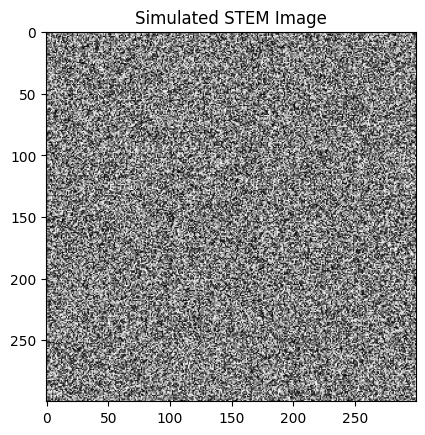

In [12]:
# works with images upt to size = 300 - working on it
img = tem.get_scanned_image(scanning_detector='HAADF', size=300, dwell_time=10e-6)

plt.imshow(img, cmap="gray")
plt.title("Simulated STEM Image")
plt.show()


In [16]:
img.shape

(16,)

### Getting a spectrum takes 3 seconds:

In [ ]:
spec = tem.get_spectrum(512)

plt.plot(spec)
plt.title("Simulated Spectrum")
plt.show()

ValueError: buffer size must be a multiple of element size

### Why not both at once?

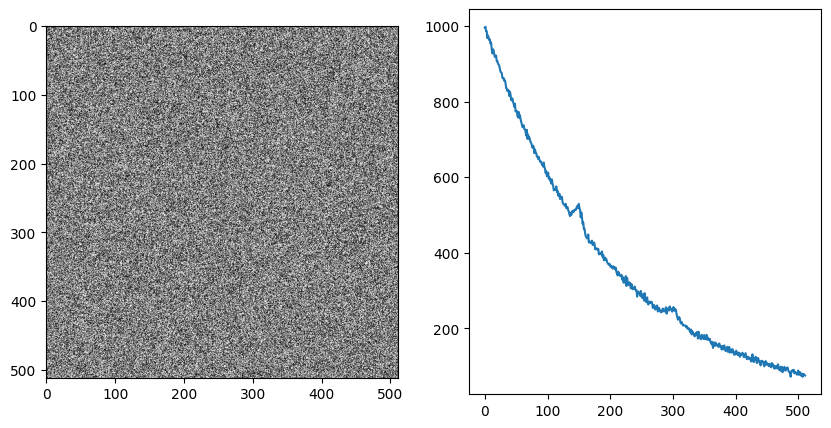

In [ ]:
image, spec = tem.get_image_and_spectrum(512, 512)

fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].imshow(image, cmap="gray")
ax[1].plot(spec)


In [ ]:
msg = f"AS_connect_AS {'localhost'} {1234}"

In [ ]:
encoded = msg.encode()
print(encoded)

b'AS_connect_AS localhost 1234'


In [ ]:
decoded = encoded.decode().strip()
print(decoded)

AS_connect_AS localhost 1234


In [ ]:
backend_cmd = decoded[len("AS_"):]
print(backend_cmd)

connect_AS localhost 1234
